In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("data/nonull_cleaned_data.csv")

In [63]:

df.isnull().sum()
df.shape
df.columns

Index(['type', 'subtype', 'bedroomCount', 'toilet_and_bath', 'province',
       'locality', 'postCode', 'habitableSurface', 'buildingCondition',
       'facedeCount', 'hasTerrace', 'epcScore', 'price', 'totalParkingCount'],
      dtype='object')

In [64]:
numeric_columns=["bedroomCount","habitableSurface","facedeCount", "toilet_and_bath","totalParkingCount", "price"]   #"toilet_and_bath",,"totalParkingCount"
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply the function
df= remove_outliers_iqr(df, numeric_columns)

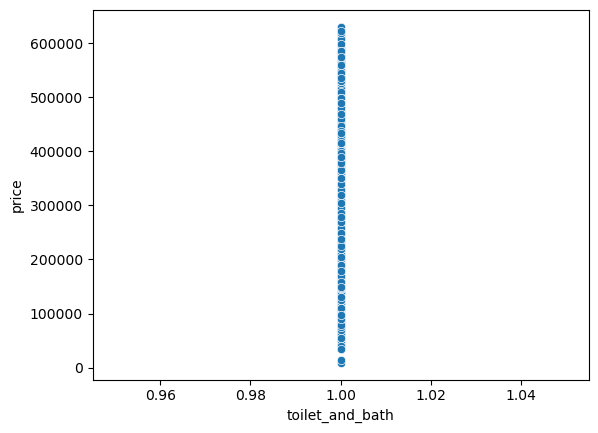

In [65]:
sns.scatterplot(data=df, x= "toilet_and_bath",  y="price")
plt.show()

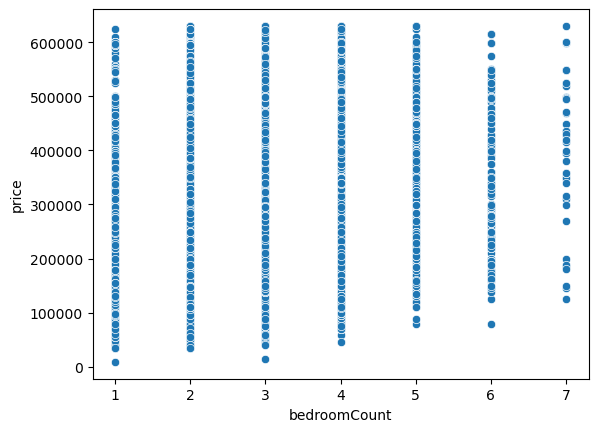

In [66]:
sns.scatterplot(data=df, x= "bedroomCount",  y="price")
plt.show()

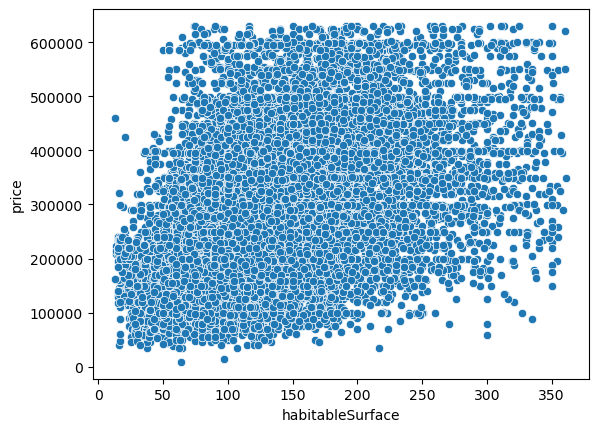

In [67]:
sns.scatterplot(data=df, x= "habitableSurface",  y="price")
plt.show()